# Shopify Fall 2021 Data Science Intern Challenge

## Question 1
As a first step I will read the data and plot the variable of interest for this problem, the order value.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
ifig = 0

In [3]:
# Read Data
data = pd.read_csv("ShopifyChallenge.csv")
order_amts = data['order_amount']
data.head()


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


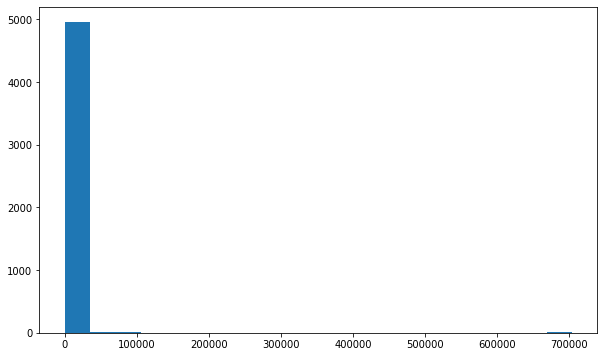

In [14]:
#Plotting order amounts
plt.close(ifig); plt.figure(ifig, figsize=(10,6)); ifig+=1;
plt.hist(order_amts, bins = 20)
plt.show()

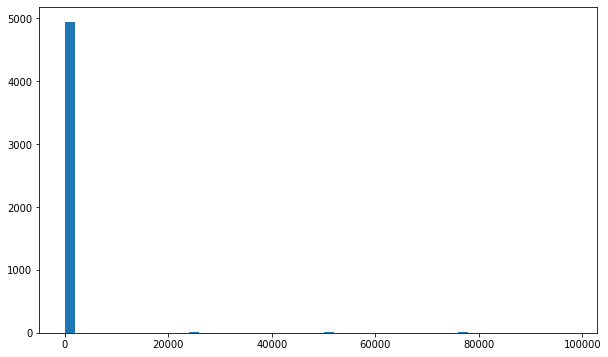

In [15]:
# Changing the range reveals another layer of outliers
plt.close(ifig); plt.figure(ifig, figsize=(10,6)); ifig+=1;
plt.hist(order_amts, bins = np.arange(0,100000,2000))
plt.show()

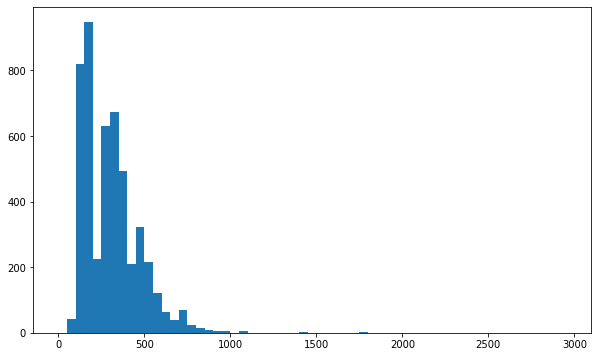

In [17]:
# Finally, the "meat" of the distribution
plt.close(ifig); plt.figure(ifig, figsize=(10,6)); ifig+=1;
plt.hist(order_amts, bins = np.arange(0,3000,50))
plt.show()

Clearly there are some very strong outliers in this data, which are artificially inflating the AOV. There are many methods of mitigating the effect of such outliers. I could take a simple median (shown below), however the median is best employed in symmetric data otherwise it misses important data in the tail of the distribution. As a result I will instead attempt to remove the outliers and then compute the mean. I do so using a common threshold for identifying extreme outliers using the interquartile range given by:

$$ Q_3 + 6*(Q_3 - Q_1) $$

where $Q_3$ is the 75th percentile and $Q_1$ is the 25th.

In [9]:
#Computing the median
np.median(order_amts)

284.0

In [18]:
# Computing the threshold for outlier removal
iqr = st.iqr(order_amts)
thresh = iqr*6 + np.percentile(order_amts,75)
print(thresh)

1752.0


In [37]:
# Computing the mean of the outlier-removed data
mask = order_amts < iqr_plus_75th
np.mean(order_amts[mask])

302.2852512155592

This outlier removal gives a threshold of 1752, which by visual inspection of the data is very reasonable! The **AOV with outliers removed** is then: **$302.28**.

## Question 2

1. Join shipper information with order information by matching shipper IDs, count the instances of Speedy Express:

```sql
SELECT COUNT(ShipperName) 
FROM Orders INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID 
WHERE ShipperName = 'Speedy Express';
```

2. Join employee information with order information by matching employee IDs, count orders by employee by last name, and select the top one when ordered descending:

```sql
SELECT TOP 1 LastName 
FROM Orders INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID 
GROUP BY LastName 
ORDER BY Count(LastName) DESC;
```

3. Join orders with order details (gives product IDs) and customers (gives country) by order ID and customer ID, then join with products by product ID. This gives all the information needed. Make sure country is Germany, then count product names and select the top one when ordered descending.

```sql
SELECT TOP 1 ProductName 
FROM (((Orders INNER JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID) 
       INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID) 
      INNER JOIN Products ON Products.ProductID = OrderDetails.ProductID) 
WHERE Country = 'Germany' 
GROUP BY ProductName 
ORDER BY COUNT(ProductName) DESC
```
